**Assignment - 01: Image Classification: A Comparison of Manhattan (L1) and Euclidean (L2) Distances with 5-fold Cross-Validation.**

Md Samiul Rayan Rifat.

ID: 22-49975-3

Sec:B

Sub: Computer Vision & Pattern Recognition

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import os

dataset_path = "/content/drive/MyDrive/AIUB/CVPR/MID/DataSet/animal_dataset/"
classes = os.listdir(dataset_path)


In [21]:
for folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, folder)
    if os.path.isdir(class_path):
        print(folder, ":", len(os.listdir(class_path)), "images")

cat : 100 images
dog : 100 images
panda : 100 images


**Load Dataset and Preprocess Data,Resize(32x32) in Grey**

In [25]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

X = []
y = []

img_size = (32, 32)

for label, cls in enumerate(classes):
    cls_path = os.path.join(dataset_path, cls)
    file_list = os.listdir(cls_path)
    print(f"Loading {len(file_list)} images from class '{cls}'")

    for img_name in file_list:
        img_path = os.path.join(cls_path, img_name)
        try:
            img = imread(img_path)
        except:
            print(f"Could not read {img_path}")
            continue

        if len(img.shape) == 3 and img.shape[2] == 3:
            gray = rgb2gray(img)
        else:
            gray = img

        gray_resized = resize(gray, img_size, anti_aliasing=True)

        X.append(gray_resized.flatten())
        y.append(label)

X = np.array(X)
y = np.array(y)

print("Dataset shape:", X.shape)
print("Labels shape:", y.shape)

Loading 100 images from class 'cat'
Loading 100 images from class 'dog'
Loading 100 images from class 'panda'
Dataset shape: (300, 1024)
Labels shape: (300,)


**KNN + 5-Fold CV**

In [33]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

k_values = [1, 3, 5, 7, 9]
distances = ['manhattan', 'euclidean']
results = {dist: [] for dist in distances}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for dist in distances:
    avg_accuracies = []
    for k in k_values:
        fold_accuracies = []
        for train_idx, val_idx in kf.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            knn = KNeighborsClassifier(n_neighbors=k, metric=dist)
            knn.fit(X_train, y_train)
            acc = knn.score(X_val, y_val)
            fold_accuracies.append(acc)

        avg_accuracies.append(np.mean(fold_accuracies))
    results[dist] = avg_accuracies


# L1,L2 accuracy using 5-Fold
table = pd.DataFrame({
    "K": k_values,
    "Manhattan (L1) Accuracy": results["manhattan"],
    "Euclidean (L2) Accuracy": results["euclidean"]
})


print("\n KNN RESULTS TABLE (5-FOLD CV) \n")
print(table.to_string(index=False))


 KNN RESULTS TABLE (5-FOLD CV) 

 K  Manhattan (L1) Accuracy  Euclidean (L2) Accuracy
 1                 0.356667                 0.353333
 3                 0.393333                 0.376667
 5                 0.386667                 0.383333
 7                 0.420000                 0.406667
 9                 0.403333                 0.413333


**Plotting the accuracy results of L1 and L2 distance**

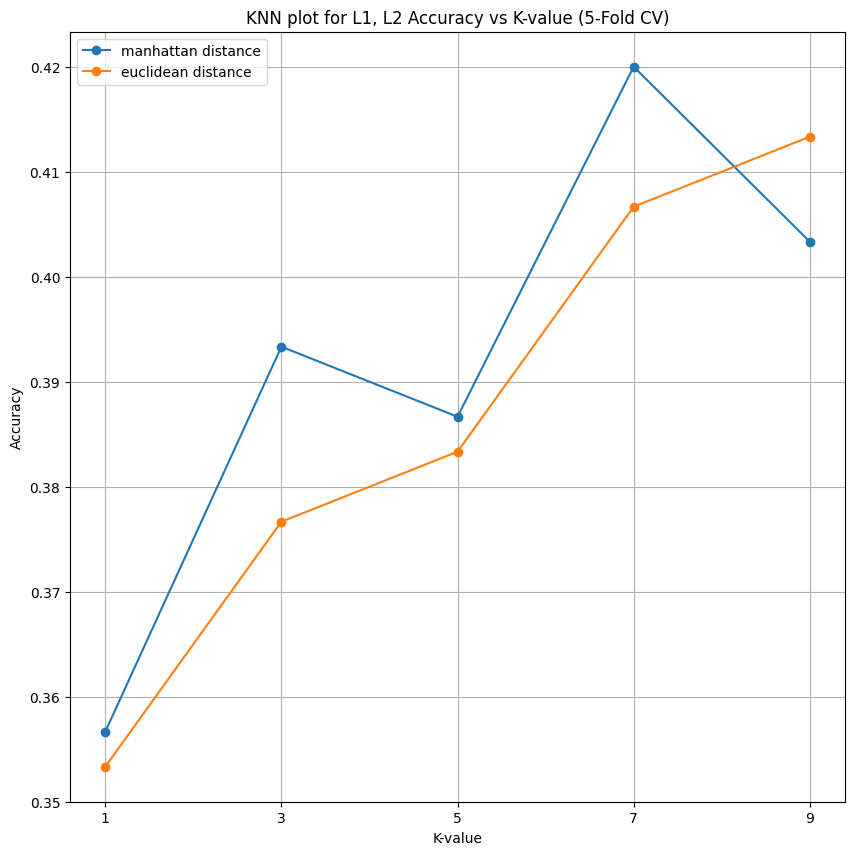

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for dist in distances:
    plt.plot(k_values, results[dist], marker='o', label=f"{dist} distance")
plt.title("KNN plot for L1, L2 Accuracy vs K-value (5-Fold CV)")
plt.xlabel("K-value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

**Discussion **

In [63]:
# Find the best K for each distance metric
best_k_l1 = k_values[np.argmax(results['manhattan'])]
best_k_l2 = k_values[np.argmax(results['euclidean'])]

print(f"Best K for Manhattan (L1): {best_k_l1}")
print(f"Best K for Euclidean (L2): {best_k_l2}")


# Final KNN models with best k value
knn_l1 = KNeighborsClassifier(n_neighbors=best_k_l1, metric='manhattan')
knn_l1.fit(X, y);

knn_l2 = KNeighborsClassifier(n_neighbors=best_k_l2, metric='euclidean')
knn_l2.fit(X, y);



# Compare average CV accuracies
avg_l1 = np.mean(results['manhattan'])
avg_l2 = np.mean(results['euclidean'])

print(f"Average 5-Fold CV Accuracy:")
print(f"  Manhattan (L1): {avg_l1*100:.2f}%")
print(f"  Euclidean (L2): {avg_l2*100:.2f}%\n")

if avg_l1 > avg_l2:
    print("Observation: Manhattan (L1) distance performed slightly better on average.")
elif avg_l2 > avg_l1:
    print("Observation: Euclidean (L2) distance performed slightly better on average.")
else:
    print("Observation: Both distances performed equally on average.")

print("\nDiscussion Points:")
print("1. The dataset contains grayscale images (32x32), which reduces feature complexity.")
print("2. L1 distance may be more robust to outliers, while L2 emphasizes larger differences in pixel values.")
print("3. The choice of K affects accuracy: smaller K may overfit, larger K may underfit.")
print("4. Limitations: small dataset (300 images) may not fully reflect real-world variability.")
print("5. Potential improvements: data augmentation, feature extraction (like CNN features), tuning K further.")



Best K for Manhattan (L1): 7
Best K for Euclidean (L2): 9
Average 5-Fold CV Accuracy:
  Manhattan (L1): 39.20%
  Euclidean (L2): 38.67%

Observation: Manhattan (L1) distance performed slightly better on average.

Discussion Points:
1. The dataset contains grayscale images (32x32), which reduces feature complexity.
2. L1 distance may be more robust to outliers, while L2 emphasizes larger differences in pixel values.
3. The choice of K affects accuracy: smaller K may overfit, larger K may underfit.
4. Limitations: small dataset (300 images) may not fully reflect real-world variability.
5. Potential improvements: data augmentation, feature extraction (like CNN features), tuning K further.


**Function to display top 5 predictions**

In [60]:
def show_top5_predictions(X, y, classes, knn_model, distance_type='Distance', img_size=(32,32)):
    top5_indices = np.arange(5)
    X_top5 = X[top5_indices]
    y_top5_true = y[top5_indices]
    y_top5_pred = knn_model.predict(X_top5)

    plt.figure(figsize=(15,3))
    for i, idx in enumerate(top5_indices):
        img_2d = X[idx].reshape(img_size)
        plt.subplot(1, 5, i+1)
        plt.imshow(img_2d, cmap='gray')
        plt.title(f"True: {classes[y[idx]]}\nPred: {classes[y_top5_pred[i]]}")
        plt.axis('off')

    plt.suptitle(f"Top 5 Predictions ({distance_type})", fontsize=10)
    plt.tight_layout()
    plt.show()


**Display top 5 predictions for both L1 and L2**

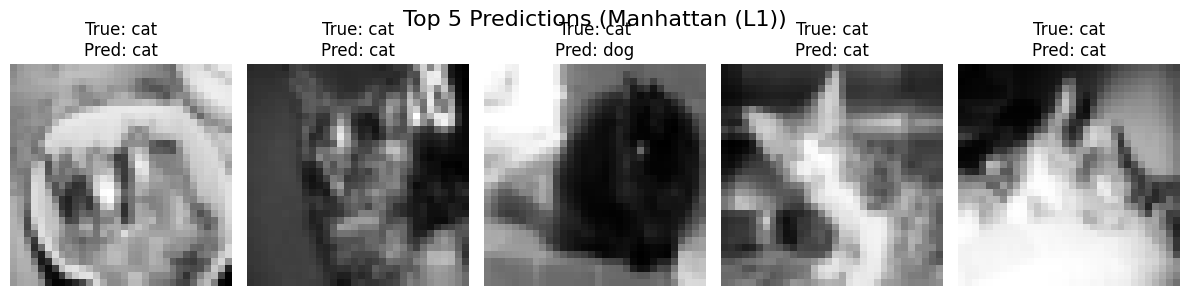

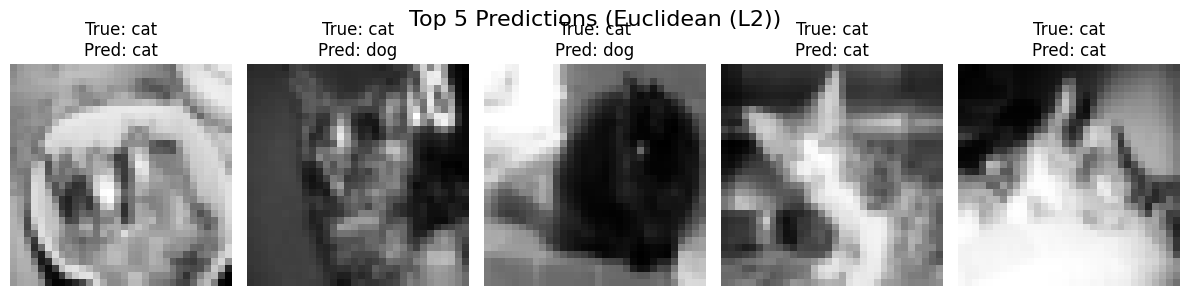

In [53]:
show_top5_predictions(X, y, classes, knn_l1, distance_type='Manhattan (L1)')
show_top5_predictions(X, y, classes, knn_l2, distance_type='Euclidean (L2)')
